In [17]:
from preprocessing import (
    preprocess_kjv,
    get_word_types_with_tf_idf,
    get_gospel_top_70_words_dictionary,
)
from extract_relations import (
    get_directed_relations,
    order_directed_relations,
)
from ontology_algorithm import (
    construct_ontology_hierarchy,
    print_hierarchy_tree_from_ontology,
    draw_hierarchy_tree_from_ontology,
)
from topic_modeling import (
    kmeans_tfidf_clustering,
)
import re

## Preprocessing

We will preprocess words from the theology reconsidered text using tf-idf and extract the top n words.

In [18]:
theology_reconsidered_path = "/Users/zebo/Documents/Freelancing/upwork/Peter_J_Worth_Jr/NLP/hierarchical_clustering/data/theology_reconsidered.txt"

with open(theology_reconsidered_path, "r") as f:
    theology_reconsidered = f.read()

def split_into_chapters(input_filename, verbose=False):
    """Split the input file into chapters."""
    titles = []
    chapters = []
    # Open the input file and read its contents
    with open(input_filename, 'r', encoding='utf-8') as input_file:
        contents = input_file.read()

    # Split the contents into chunks based on the separator criteria
    chunks = contents.split('\n\n\n\n')             # empty lines in the text

    ch_cnt = 0

    # Create an output file for each chunk
    for i, chunk in enumerate(chunks):
        # Skip empty chunks
        if not chunk.strip():
            continue

        # Extract the title and content from the chunk
        lines = chunk.strip().split('\n')
        title = lines[0]
        content = '\n'.join(lines[1:])

        if verbose:
            print("processing CH" + str(ch_cnt) + ": " + title + "...")

        # Create the output file
        chapters.append(content)
        titles.append(title)

        ch_cnt += 1
    return titles, chapters

titles, chapters = split_into_chapters(theology_reconsidered_path)

chapters[0]

# Should I remove the word Figure?

# Remove \n from the chapters.
chapters = [chapter.replace("\n", "") for chapter in chapters]
# Remove \t from the chapters.
chapters = [chapter.replace("\t", " ") for chapter in chapters]


# import re

# Separate the chapters into sentences.
sentences_per_chapter_prep = [re.split("\.  ", chapter) for chapter in chapters]
sentences_per_chapter_prep = [[sentence + "." for sentence in chapter] for chapter in sentences_per_chapter_prep]

sentences_per_chapter = []
for chapter_prep in sentences_per_chapter_prep:
    chapter = []
    for sentence in chapter_prep:
        chapter.extend(re.split("(?<!i.e|etc|e.g|iii)\. ", sentence))
    sentences_per_chapter.append(chapter)

#sentences_per_chapter[0]
for title_index, title in enumerate(titles):
    print(title_index, title)

0 Introduction
1 Prologue: Mythos and Mysticism in Antiquity
2 A Brief History of the Mystical Arts: Beyond Yoga
3 Meditation as a Mystical Art: A Bridge Through Time 
4 Overarching Themes: The Laurasian Hypothesis and a New Metaphysics
5 Setting the Stage: A Brief of History of Modern Man
6 Part I: On Creation Mythos (Cosmogony)
7 From Language to Writing: The Dawn of History
8 The Ancient Hebrews: The Tanakh, Torah and Five Books of Moses
9 Ancient Egyptian Mythos: The Weighing of the Heart, Ra and Ma'at
10 The Enûma Eliš: Sumer- Babylonian Creation Mythos
11 Ancient Persian Theology: Zarathustra and the Avesta
12 Classic Hellenic Theogony: Chaos, Chronos and Eros
13 Orphic Theogony: Thanes and the Great Cosmic Egg
14 Vedic Cosmogony: Skepticism, Puruṣa and Hiraṇyagarbha 
15 Ancient Chinese Theology: Shàngdì, Pángǔ, Tiān and the Dao
16 Roman Cosmogony: The Metamorphoses of Ovid
17 Eurasian Mythos: Establishing the Laurasian Hypothesis 
18 Part II: On Ancient Philosophy (Logos)
19 Fro

## Perform topic modeling

In [19]:
NUM_TOPICS = 6
clusters, key_terms_per_cluster = kmeans_tfidf_clustering(
    chapters=chapters,
    num_topics=NUM_TOPICS,
)

CLUSTER #1
Key Features: ['intellectual', 'kant', 'philosophy', 'philosophical', 'metaphysics', 'knowledge', 'reality', 'aristotle', 'awareness', 'ontological', 'epistemological', 'quality', 'pirsig', 'well', 'one', 'also', 'rational', 'experience', 'framework', 'western', 'quantum', 'science', 'existence', 'metaphysical', 'global', 'fact', 'work', 'within', 'upon', 'plato', 'reason', 'objective', 'notion', 'least', 'perspective', 'ancient', 'west', 'even', 'theory', 'paradigm', 'ontology', 'cognitive', 'world', 'metaphysics awareness', 'order', 'mystical', 'scientific', 'enlightenment', 'morality', 'theo']
Cluster Chapters: [0, 34, 39, 54, 55, 56, 57]
CLUSTER #2
Key Features: ['quantum', 'mechanics', 'theory', 'reality', 'relativity', 'quantum theory', 'science', 'one', 'physics', 'einstein', 'quantum mechanics', 'world', 'physical', 'subatomic', 'laws', 'scientific', 'quality', 'mathematical', 'classical mechanics', 'well', 'even', 'particles', 'intellectual', 'freud', 'time', 'philo

## Find top_n_words using tf

In [20]:
# Specify the chapters used in the analysis.
chosen_cluster = 1

chosen_chapters = clusters[chosen_cluster]

key_terms = key_terms_per_cluster[chosen_cluster]

print("Chosen chapters ", chosen_chapters)

# Specify the number of top words to use.
n = 50

text_per_chapter = []
for chapter_idx in chosen_chapters:
    text_per_chapter.append(chapters[chapter_idx])

tf_idf_pre_filtering = get_word_types_with_tf_idf(
    text_per_chapter,
    "tf",
    skip_stopwords=True,
    include_verbs=False,
    include_determiners=False,
    include_pronouns=False,
    include_adverbs=False,
    include_numbers=False,
)

top_n_words = tf_idf_pre_filtering.head(n)["word"].values

# See difference between top words and key terms.
print("Top words: ", top_n_words)
print("Key terms: ", key_terms)
print("Overlap: ", set(top_n_words).intersection(set(key_terms)))
print("Symmetric difference: ", set(top_n_words).symmetric_difference(set(key_terms)))

Chosen chapters  [0, 34, 39, 54, 55, 56, 57]
Top words:  ['intellectual' 'philosophy' 'philosophical' 'knowledge' 'metaphysics'
 'aristotle' 'reality' 'kant' 'existence' 'metaphysical' 'rational'
 'western' 'awareness' 'framework' 'ontological' 'fact' 'within' 'upon'
 'work' 'epistemological' 'experience' 'quality' 'notion' 'world' 'least'
 'plato' 'order' 'ancient' 'perspective' 'science' 'reason' 'sense' 'way'
 'west' 'modern' 'theology' 'principle' 'tradition' 'pirsig' 'course'
 'example' 'quantum' 'god' 'time' 'era' 'eastern' 'mind' 'system' 'theory'
 'must']
Key terms:  ['intellectual', 'kant', 'philosophy', 'philosophical', 'metaphysics', 'knowledge', 'reality', 'aristotle', 'awareness', 'ontological', 'epistemological', 'quality', 'pirsig', 'well', 'one', 'also', 'rational', 'experience', 'framework', 'western', 'quantum', 'science', 'existence', 'metaphysical', 'global', 'fact', 'work', 'within', 'upon', 'plato', 'reason', 'objective', 'notion', 'least', 'perspective', 'ancient

In [21]:
tf_idf_pre_filtering.head(n)

,word,word_type,tc,tf,dc,idf,tf_idf
0,intellectual,"{'JJ': 275, 'NN': 1}",279,0.004765,7,0.000000,0.000000
1,philosophy,"{'NN': 212, 'NNP': 43, 'ORGANIZATION': 8, 'PER...",266,0.004543,7,0.000000,0.000000
2,philosophical,"{'JJ': 170, 'NNP': 4, 'NN': 7, 'GSP': 1}",246,0.004201,7,0.000000,0.000000
3,knowledge,"{'NN': 194, 'NNP': 2, 'ORGANIZATION': 1, 'VB':...",210,0.003586,7,0.000000,0.000000
4,metaphysics,"{'NNPS': 13, 'ORGANIZATION': 69, 'NNS': 167, '...",200,0.003415,7,0.000000,0.000000
5,aristotle,"{'NNP': 183, 'PERSON': 118, 'GPE': 63, 'ORGANI...",186,0.003176,7,0.000000,0.000000
10,reality,{'NN': 161},161,0.002749,7,0.000000,0.000000
11,kant,"{'NNP': 148, 'ORGANIZATION': 63, 'PERSON': 62,...",153,0.002613,5,0.336472,0.000879
12,existence,"{'NN': 140, 'JJ': 1, 'VB': 1}",144,0.002459,7,0.000000,0.000000
13,metaphysical,"{'JJ': 127, 'NN': 8}",137,0.002340,7,0.000000,0.000000


In [22]:
# print the row with word "cross"
tf_idf_pre_filtering[tf_idf_pre_filtering["word"] == "kant"]

,word,word_type,tc,tf,dc,idf,tf_idf
11,kant,"{'NNP': 148, 'ORGANIZATION': 63, 'PERSON': 62,...",153,0.002613,5,0.336472,0.000879


# Extract relations from the corpus

In [23]:
# Create a list of all verses of the chosen books.
all_verses = []
for chapter_idx in chosen_chapters:
    all_verses.extend(sentences_per_chapter[chapter_idx])

In [24]:
import spacy

nlp = spacy.load("en_core_web_lg")
doc_1 = nlp(all_verses[98])
spacy.displacy.render(doc_1, style="dep", jupyter=True)

In [25]:
directed_relations, relations_to_verbs = get_directed_relations(
    top_n_words=top_n_words,
    all_verses=all_verses,
    verbose=False,
)

In [26]:
ordered_directed_relations = order_directed_relations(
    directed_relations=directed_relations,
    tf_idf_pre_filtering=tf_idf_pre_filtering,
    order_by="product",
    include_ordering_wrt_occurences=True,
    verbose=False,
)

## Construct the ontology hierarchy

In [27]:
ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
    ordered_directed_relations=ordered_directed_relations,
)
# print_hierarchy_tree_from_ontology(
#     ontological_hierarchy=ontology_hierarchy,
#     words_with_parents=words_with_parents,
# )

In [28]:
# draw_hierarchy_tree_from_ontology(
#     ontological_hierarchy=ontology_hierarchy,
#     relations_to_verbs=relations_to_verbs,
# )

## Run for all parts of the text

Cluster: # 1
Chosen chapters 

Introduction
Aristotle's Metaphysics: Causality and Theology in Antiquity
The Metaphysics of Morality: Kantian Cognitive Ontology
The Law of Unintended Consequences and The Death of the Soul
Into the Mystic: The Great Epistemological Divide
An Ontological Retrospective: Another Look at Aristotle and Pirsig
Metaphysics of Awareness


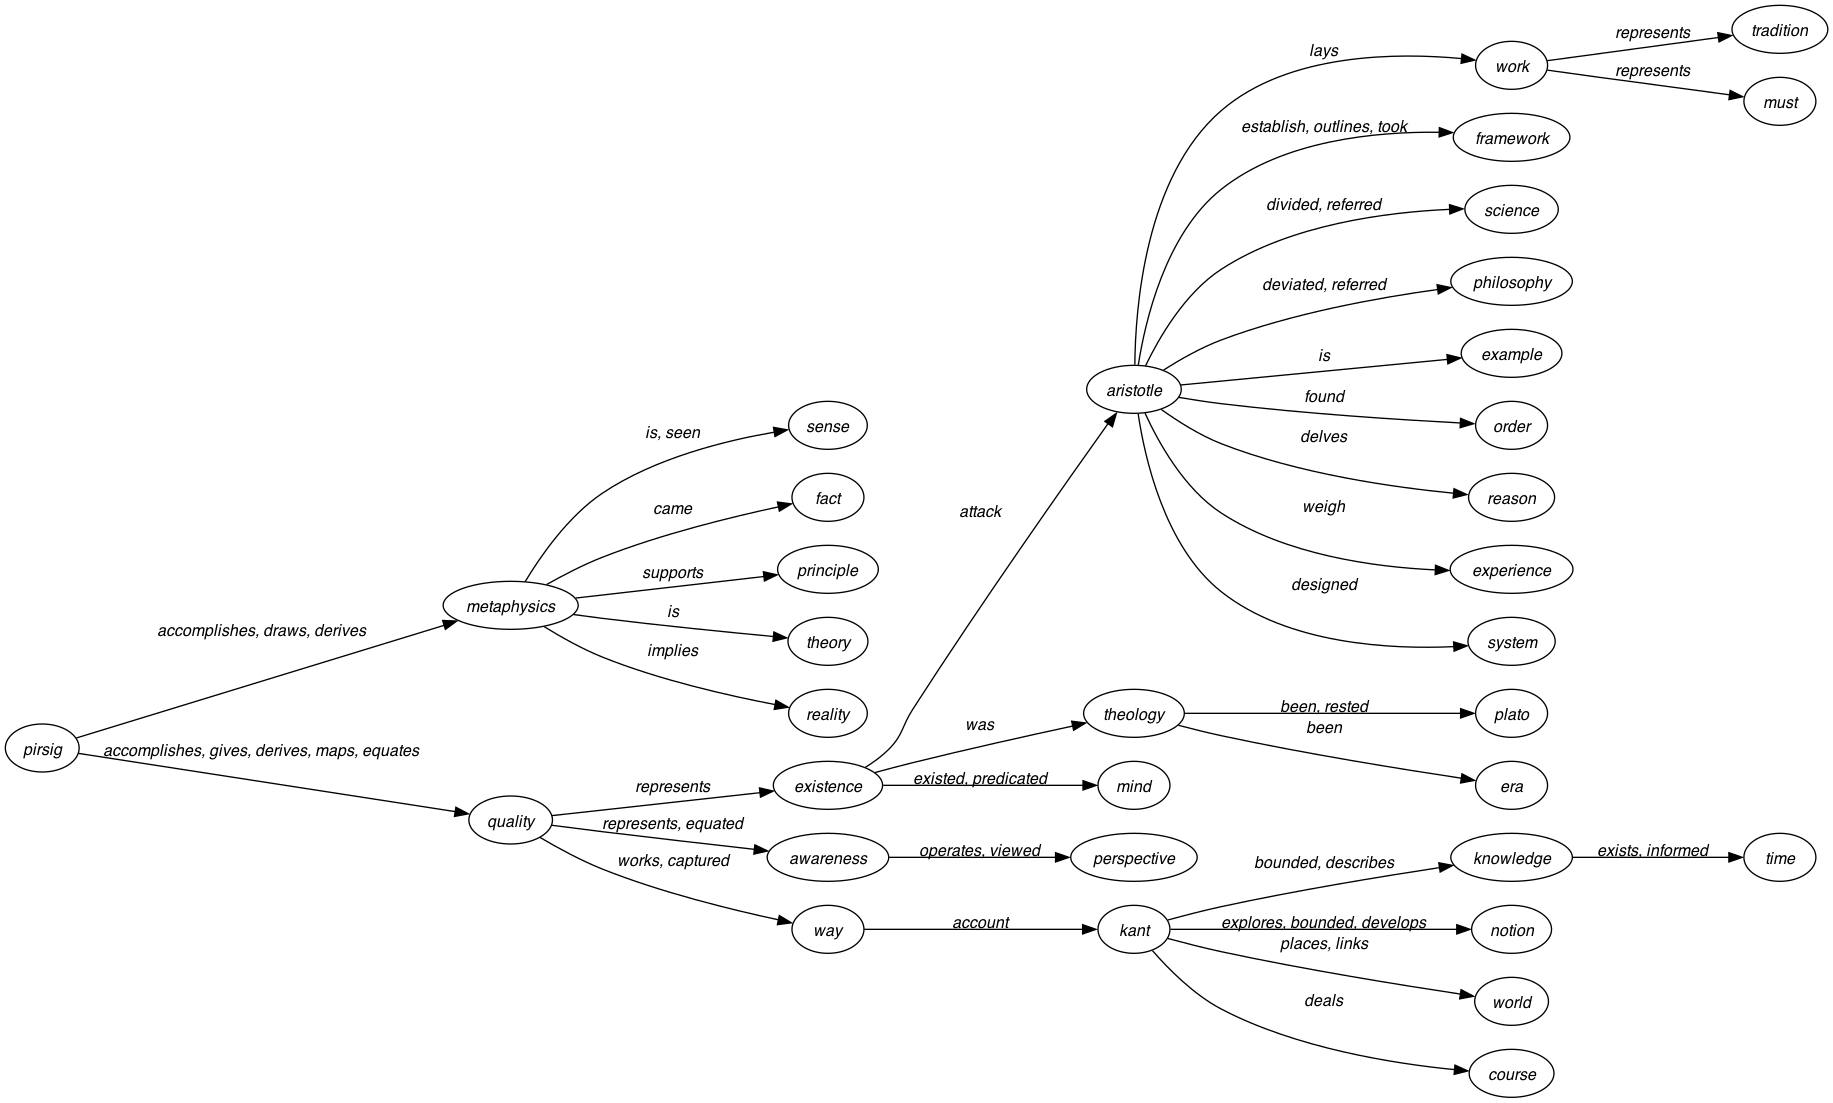

Cluster: # 2
Chosen chapters 

The Age of Enlightenment: The Philosophy of Science
Albert Einstein: Spacetime and Relativity Theory
Quantum Mechanics: Wave-Particle Duality and Uncertainty
Schrödinger's Cat: The Death of Local Realism
The View from the West: The History of Objective Realism
Interpretations of Quantum Theory: Physics Meets Philosophy
Modern Psychology: Freud Versus Jung
Subject-Object Metaphysics and Quality: A Reformulation of Logical Positivism 
Ontology in the Quantum Era: A Retrospective 


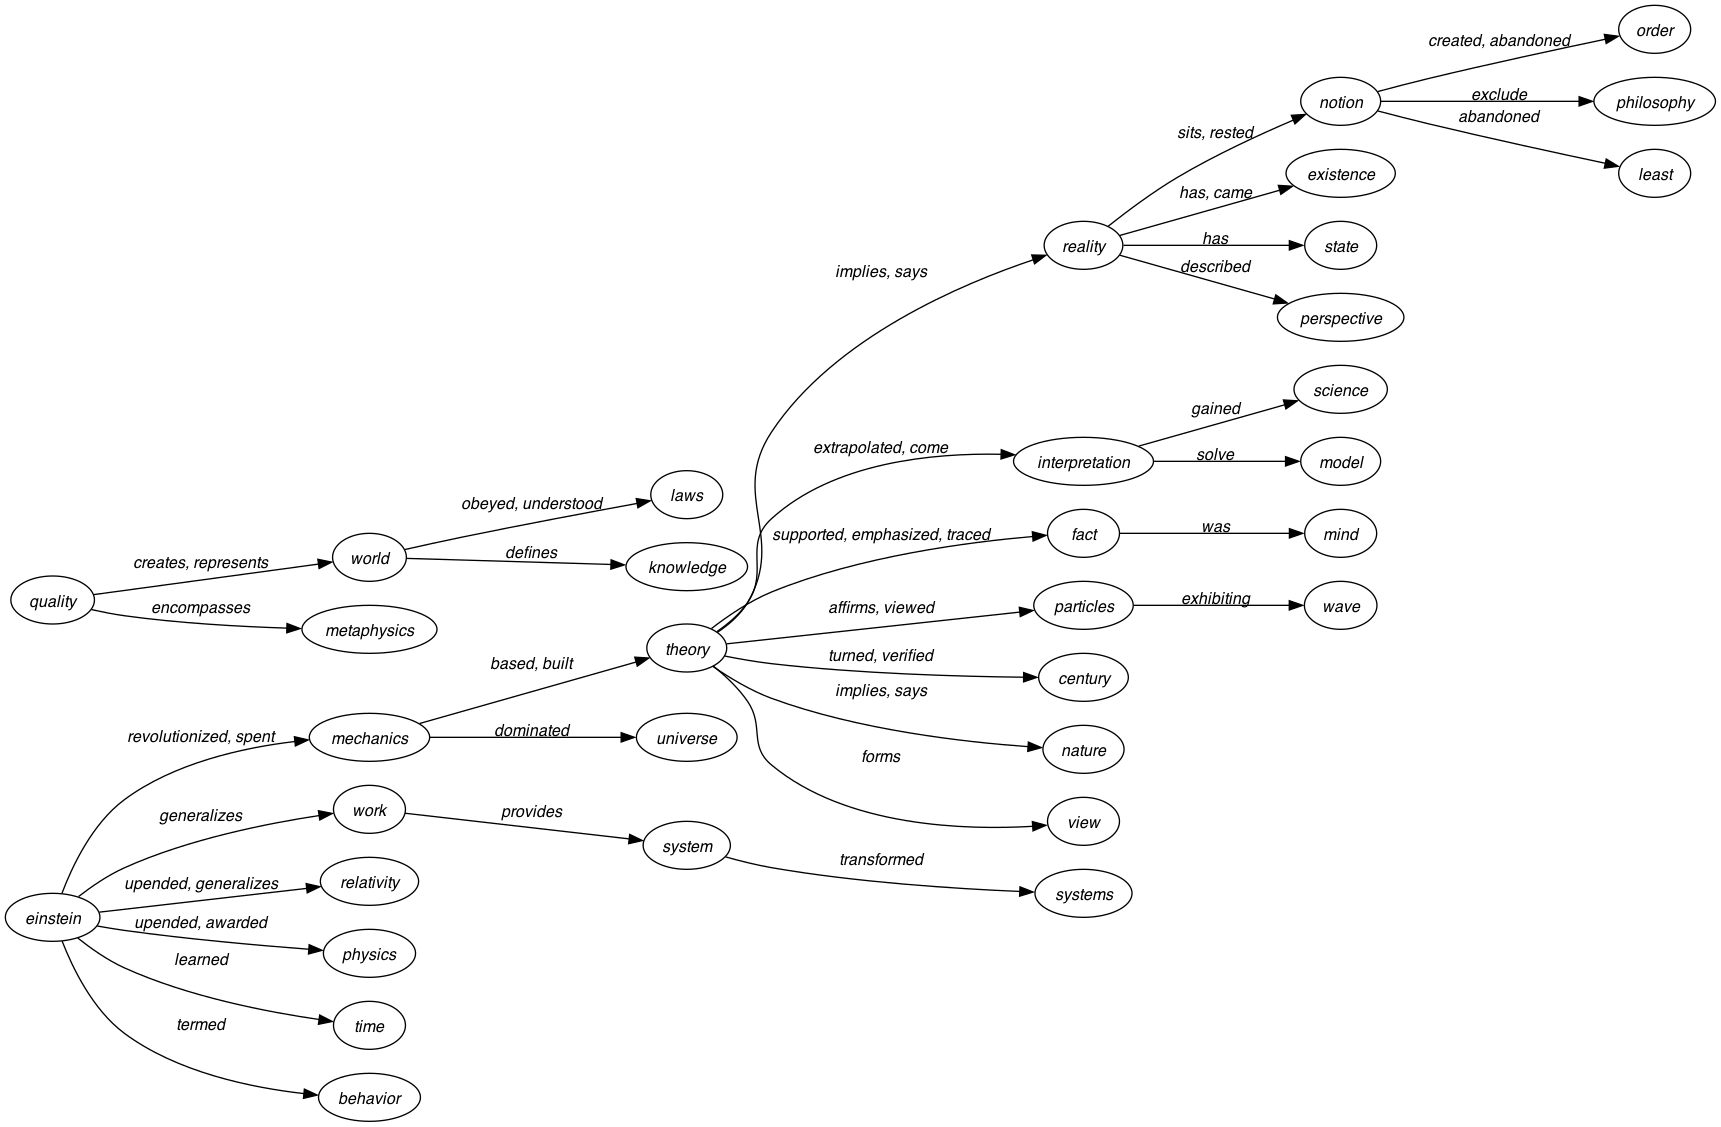

Cluster: # 3
Chosen chapters 

Ancient Chinese Theology: Shàngdì, Pángǔ, Tiān and the Dao
From the Far East: The Translation Challenge
Ancient Chinese Theology: From Shàngdì to Tiān 
The Metaphysics of the I Ching: The Alignment of Heaven, Man and Earth 
Early Chinese Philosophy: The Humanism of Confucius
The Lǎozǐ and Zhuangzi: Daoism and the Way of Virtue
Chinese Philosophy: Back to the Beginning


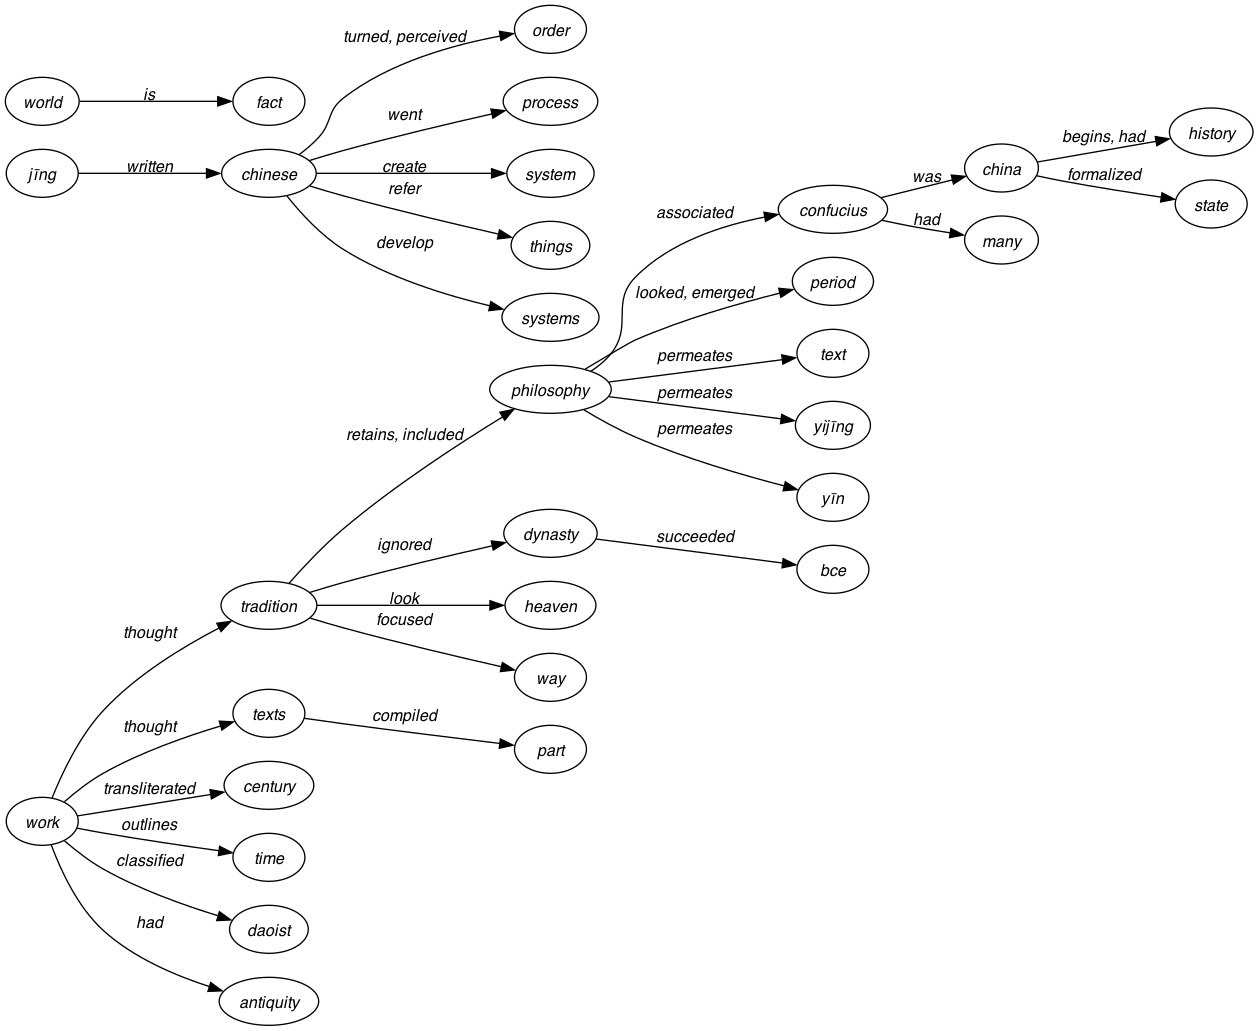

Cluster: # 4
Chosen chapters 

Upanishadic Philosophy: Brahmavidyā and the Soul
Buddhist Philosophy: Impermanence, Suffering and the "No-Self"
Pythagoras: The Father of Hellenic Philosophy
The Legacy of Socrates: Skepticism, Knowledge and Reason
Plato and the Allegory of the Cave: Ideas, Being and Becoming
Indo-European Theo-Philosophy: On the Soul
Hellenic Theo-Philosophy: From Mythos to Logos
Stoicism: Naturalism, Corporealism and Logos
The Seeds of Christianity: The Hellenization of Judaism
Islamic Philosophy: Allāh as the Final Cause
Vedic Theology: Vedānta and Brahmavidyā


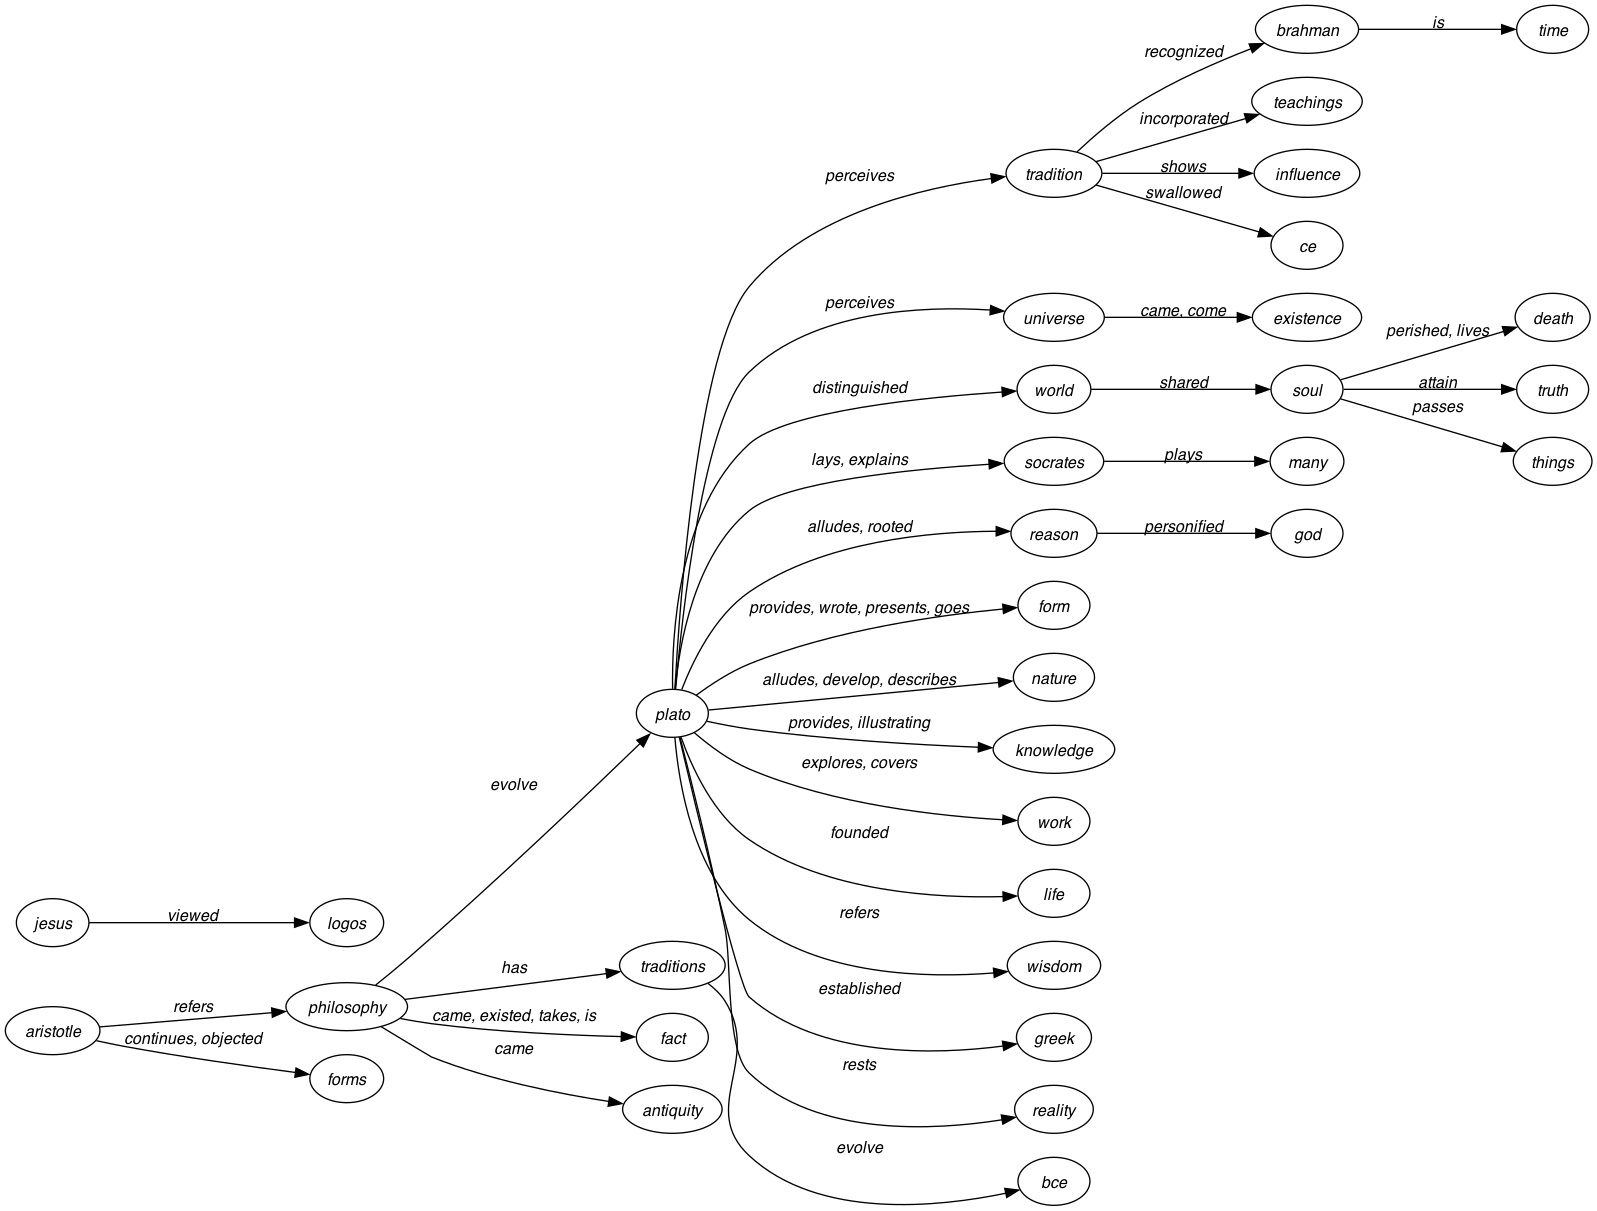

Cluster: # 5
Chosen chapters 

Prologue: Mythos and Mysticism in Antiquity
Part I: On Creation Mythos (Cosmogony)
The Ancient Hebrews: The Tanakh, Torah and Five Books of Moses
Ancient Egyptian Mythos: The Weighing of the Heart, Ra and Ma'at
The Enûma Eliš: Sumer- Babylonian Creation Mythos
Ancient Persian Theology: Zarathustra and the Avesta
Classic Hellenic Theogony: Chaos, Chronos and Eros
Orphic Theogony: Thanes and the Great Cosmic Egg
Vedic Cosmogony: Skepticism, Puruṣa and Hiraṇyagarbha 
Roman Cosmogony: The Metamorphoses of Ovid
Eurasian Mythos: Establishing the Laurasian Hypothesis 
Part II: On Ancient Philosophy (Logos)
Part III: On Religion and Science
Part IV: On Ontology and Mysticism
Part V: Metaphysics in the Quantum Era


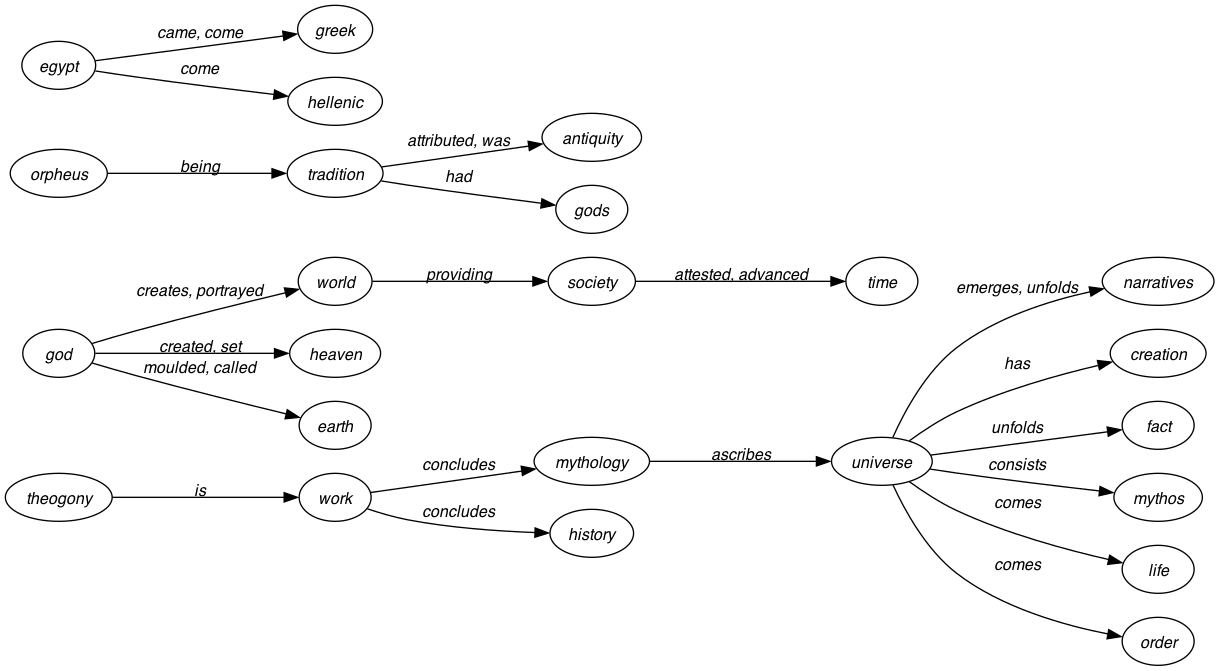

Cluster: # 6
Chosen chapters 

A Brief History of the Mystical Arts: Beyond Yoga
Meditation as a Mystical Art: A Bridge Through Time 
Overarching Themes: The Laurasian Hypothesis and a New Metaphysics
Setting the Stage: A Brief of History of Modern Man
From Language to Writing: The Dawn of History
Logos from Mythos: The Heart of Eurasian Philosophy
The Indo-Europeans: The Grandparents of Philosophy
Mysticism and Freud: Never the Two Shall Meet
Swami Vivekananda and Yoga: 20th Century Vedānta


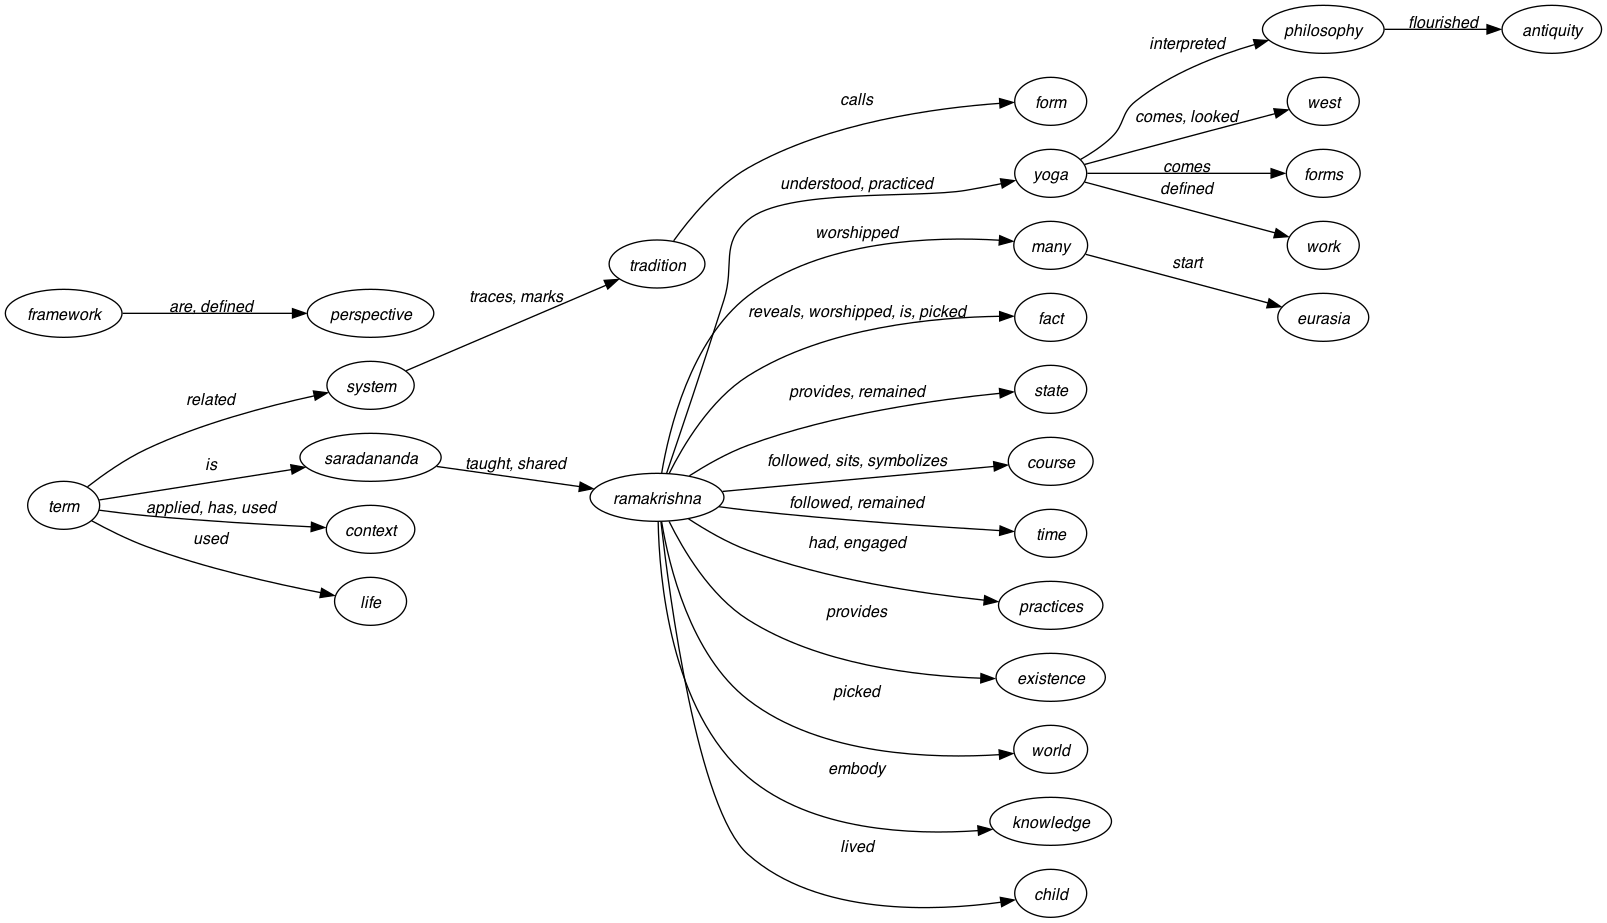

In [29]:
# Specify the chapters used in the analysis.
for cluster in range(1, NUM_TOPICS+1):
    print("Cluster: #", cluster)
    chosen_chapters = clusters[cluster]

    chapter_titles = [titles[i] for i in chosen_chapters]
    print("Chosen chapters \n")
    for title in chapter_titles:
        print(title)

    # Specify the number of top words to use.
    n = 50

    text_per_chapter = []
    for chapter_idx in chosen_chapters:
        text_per_chapter.append(chapters[chapter_idx])

    tf_idf_pre_filtering = get_word_types_with_tf_idf(
        text_per_chapter,
        "tf",
        skip_stopwords=True,
        include_verbs=False,
        include_determiners=False,
        include_pronouns=False,
        include_adverbs=False,
        include_numbers=False,
    )

    top_n_words = tf_idf_pre_filtering.head(n)["word"].values

    # Create a list of all verses of the chosen books.
    all_verses = []
    for chapter_idx in chosen_chapters:
        all_verses.extend(sentences_per_chapter[chapter_idx])
    directed_relations, relations_to_verbs = get_directed_relations(
        top_n_words=top_n_words,
        all_verses=all_verses,
        verbose=False,
    )
    ordered_directed_relations = order_directed_relations(
        directed_relations=directed_relations,
        tf_idf_pre_filtering=tf_idf_pre_filtering,
        order_by="product",
        include_ordering_wrt_occurences=True,
        verbose=False,
    )
    ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
        ordered_directed_relations=ordered_directed_relations,
    )
    # print_hierarchy_tree_from_ontology(
    #     ontological_hierarchy=ontology_hierarchy,
    #     words_with_parents=words_with_parents,
    # )
    draw_hierarchy_tree_from_ontology(
        ontological_hierarchy=ontology_hierarchy,
        relations_to_verbs=relations_to_verbs,
    )